# Comprehensive Self-Supervised method for Reconstruction High Field from Low field MRI Scans 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os

%load_ext autoreload
%autoreload 2

import lowfieldsim
import scipy.io
from fastMRI.data import transforms as Ttorch
import lowfieldsim as simulator_MRI
import Unet_MRI_7T3 as Unet

plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu
Using device: cpu


In [6]:
mat_contents = scipy.io.loadmat('Data/fat-water@3T-3echo.mat')
B0_low = 0.3
sorted(mat_contents.keys())
k_high_T = Ttorch.to_tensor(mat_contents['k_high'])

# Raw Data Presentation

Text(0.5, 1.0, 'Simulated @ 0.5 T')

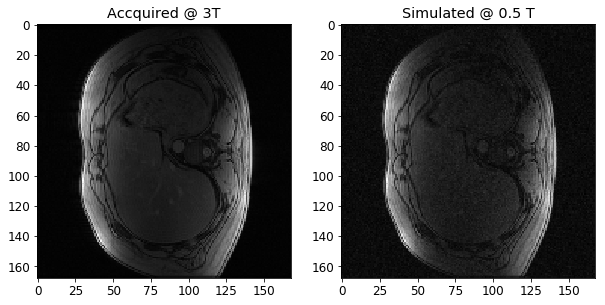

In [7]:
Testing_get_data = Unet.get_data
input_mr, target, output_gt = Testing_get_data(k_high_T.to(device))

#Target should be lowfield MRI
target_per = target.permute(1,2,0)

#Output ground thrut is the high field image
output_gt_per = output_gt.permute(1,2,0)

output_gt_per = output_gt_per.cpu()
target_per = target_per.cpu()

plt.figure(figsize=(10,10))

# Accquired
plt.subplot(121),
plt.imshow(np.sqrt(torch.sum(output_gt_per,2)), cmap='gray')
plt.title('Accquired @ 3T')

# low field
plt.subplot(122),
plt.imshow(np.sqrt(torch.sum(target_per,2)), cmap='gray');
plt.title("Simulated @ 0.5 T" )



Text(0.5, 1.0, 'Coil #4')

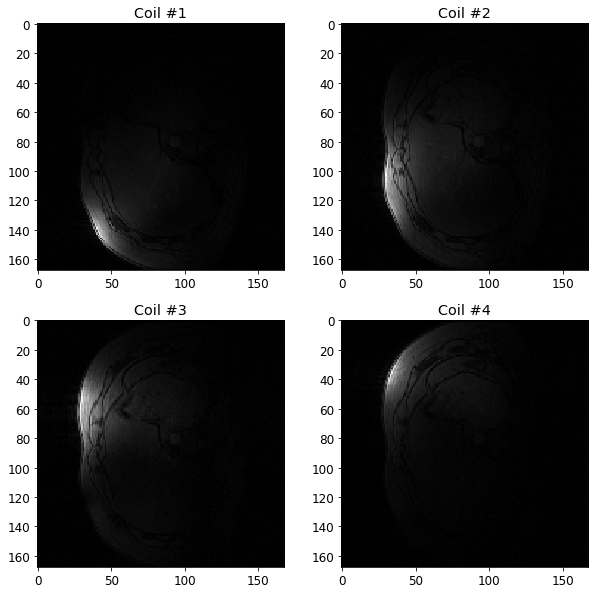

In [8]:
plt.figure(figsize=(10,10))

# Accquired
plt.subplot(221),
plt.imshow(np.sqrt(output_gt_per[:,:,0]), cmap='gray')
plt.title('Coil #1')

# low field
plt.subplot(222),
plt.imshow(np.sqrt(output_gt_per[:,:,1]), cmap='gray');
plt.title('Coil #2' )

plt.subplot(223),
plt.imshow(np.sqrt(output_gt_per[:,:,2]), cmap='gray')
plt.title('Coil #3')

# low field
plt.subplot(224),
plt.imshow(np.sqrt(output_gt_per[:,:,3]), cmap='gray');
plt.title('Coil #4')

# Normalization per Channel optimization - Comperison results w - w\o channel #5

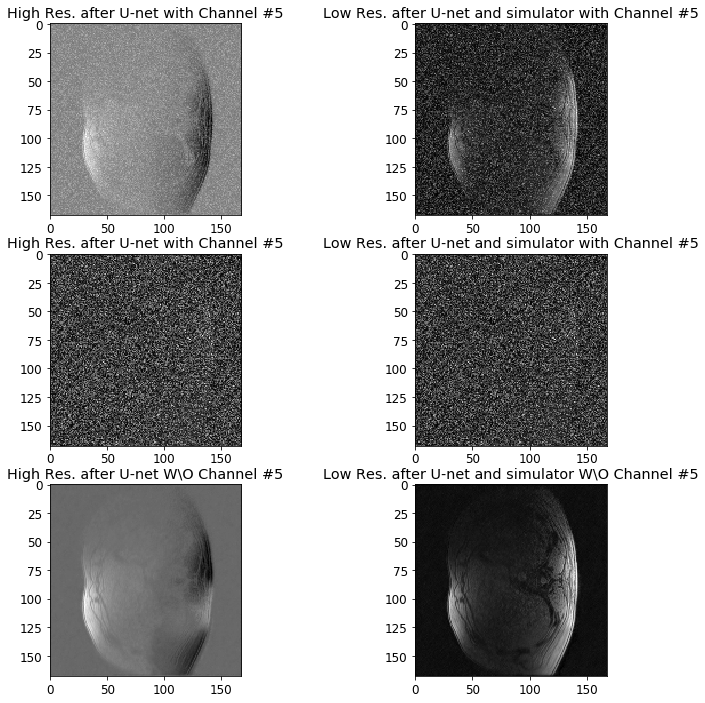

In [14]:

epoch_5000 = 0
High_res_After_Unet = torch.load(os.path.join('SavedModels', 'High Field Target Normalized Per Channel- epochs 10000 -- lr 0.2 -- Unet_channels24.pt'), map_location=device)
Low_resolution_after_Unet_and_simulator = torch.load(os.path.join('SavedModels', 'Low Field Reconstruction Normalized Per Channel- epochs 10000 -- lr 0.2 -- Unet_channels24.pt'),map_location=device)

# print(High_res_After_Unet.shape)
# 
#         print(epoch_5000.shape)
High_res_After_Unet = High_res_After_Unet.squeeze(0)
# print('High Res Shape', High_res_After_Unet.shape)
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.squeeze(0)
#         print(epoch_5000.shape)
High_res_After_Unet = High_res_After_Unet.permute(1,2,0)
# print('High Res Shape after permutation', High_res_After_Unet.shape)
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.permute(1,2,0)
#         print(epoch_5000.shape)
#         print(torch.min(epoch_5000))

High_res_After_Unet = High_res_After_Unet.cpu().detach().numpy()
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.cpu().detach().numpy()
plt.figure(figsize=(12,12))


# Accquired
plt.subplot(321),
plt.imshow(np.sqrt(np.sum(abs(High_res_After_Unet),2)), cmap='gray')
plt.title('High Res. after U-net with Channel #5')


plt.subplot(322),
plt.imshow(np.sqrt(np.sum(abs(Low_resolution_after_Unet_and_simulator),2)), cmap='gray')
plt.title('Low Res. after U-net and simulator with Channel #5')

# Channel number 5
plt.subplot(323),
plt.imshow(np.sqrt((abs(High_res_After_Unet[:,:,4]))), cmap='gray')
plt.title('High Res. after U-net with Channel #5')


plt.subplot(324),
plt.imshow(np.sqrt((abs(Low_resolution_after_Unet_and_simulator[:,:,4]))), cmap='gray')
plt.title('Low Res. after U-net and simulator with Channel #5')
          
High_res_After_Unet[:,:,4] = 0
High_res_After_Unet[:,:,6] -= 1
Low_resolution_after_Unet_and_simulator[:,:,4] = 0

# High Field original
plt.subplot(325),
plt.imshow(np.sqrt(np.sum(abs(High_res_After_Unet),2)), cmap='gray')
plt.title('High Res. after U-net W\O Channel #5')

# low field
plt.subplot(326),
plt.imshow(np.sqrt(np.sum(abs(Low_resolution_after_Unet_and_simulator),2)), cmap='gray')
plt.title('Low Res. after U-net and simulator W\O Channel #5')

plt.savefig('Figures/NormalizationPerChannel-Comperison.png')

# Best Results Presentation

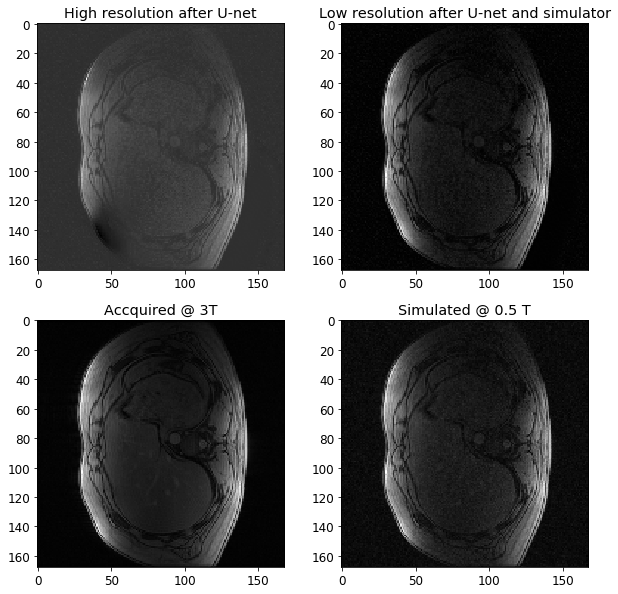

In [15]:
epoch_5000 = 0
High_res_After_Unet = torch.load(os.path.join('SavedModels', 'High Field Target - epochs 10000 -- lr 0.2 -- Unet_channels24.pt'), map_location=device)
Low_resolution_after_Unet_and_simulator = torch.load(os.path.join('SavedModels', 'Low Field Reconstruction - epochs 10000 -- lr 0.2 -- Unet_channels24.pt'),map_location=device)

# print(High_res_After_Unet.shape)
# 
#         print(epoch_5000.shape)
High_res_After_Unet = High_res_After_Unet.squeeze(0)
# print(High_res_After_Unet.shape)
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.squeeze(0)
#         print(epoch_5000.shape)
High_res_After_Unet = High_res_After_Unet.permute(1,2,0)
# print(High_res_After_Unet.shape)
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.permute(1,2,0)
#         print(epoch_5000.shape)
#         print(torch.min(epoch_5000))

High_res_After_Unet = High_res_After_Unet.cpu().detach().numpy()
Low_resolution_after_Unet_and_simulator = Low_resolution_after_Unet_and_simulator.cpu().detach().numpy()
plt.figure(figsize=(10,10))


# Accquired
plt.subplot(221),
plt.imshow(np.sqrt(np.sum(abs(High_res_After_Unet),2)), cmap='gray')
plt.title('High resolution after U-net')


plt.subplot(222),
plt.imshow(np.sqrt(np.sum(abs(Low_resolution_after_Unet_and_simulator),2)), cmap='gray')
plt.title('Low resolution after U-net and simulator')

# High Field original
plt.subplot(223),
plt.imshow(np.sqrt(torch.sum(output_gt_per,2)), cmap='gray')
plt.title('Accquired @ 3T')

# low field
plt.subplot(224),
plt.imshow(np.sqrt(torch.sum(target_per,2)), cmap='gray');
plt.title("Simulated @ 0.5 T" )   

plt.savefig('Figures/BestResults-Comperison.png')